# Title

**- A Walkthrough Example**

# Description

The aim of this HW is to let you do some analysis on your own with less structure.

# Dataset Description:
The dataset used here is the Wine data set (another commonly used sklearn dataset).  Use this to answer the questions embedded in the Notebook.

# Instructions:
1. Read the data.  
2. Do some explorations.
3. Fit some multiclass models.
4. Interpret these models.

# Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression()</a> : Generates a Logistic Regression classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit" target="_blank">sklearn.fit()</a> : Fits the model to the given data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict" target="_blank">sklearn.predict()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform pure classification predictions

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba" target="_blank">sklearn.predict_proba()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform probability predictions of all the classes in the response (they should add up to 1 for each observation)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression.coef_ and .intercept_</a> : Pull off the estimated β coefficients in a Logistic Regression model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" target="_blank">sklearn.KNeighborsClassifier</a> : Fit a k-NN classification model


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#import sklearn.metrics as met

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

First Read in the data set and take a peak at it:

In [3]:
raw = datasets.load_wine()
X_full = pd.DataFrame(raw['data'],columns=raw['feature_names'])
y = raw['target']
print(X_full.shape,y.shape)

(178, 13) (178,)


In [4]:
X_full.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**Q1**: Perform a 70-30 `train_test_split` using `random_state=109` and `shuffle=True`.  Why is it important to shuffle here?

In [5]:
### your code here
from sklearn.model_selection import train_test_split

# Assuming X_full and y have been defined as in your provided screenshot
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=109, shuffle=True)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (124, 13)
Test set size: (54, 13)


*your answer here*

Shuffling the data helps mix it up so that both training and test sets really capture the whole story of the dataset, avoiding any sneaky biases from how the data was originally lined up.

**Q2**: Explore the data a little.  Visualize the marginal association (aka, bivariate relationship) of wine type to amount of alcohol, level of malic acid, and total level of phenols.  Which predictor seems to have the strongest association with the response?

<ipython-input-6-59d5df7db7e9>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='alcohol', y='Type', palette='viridis')


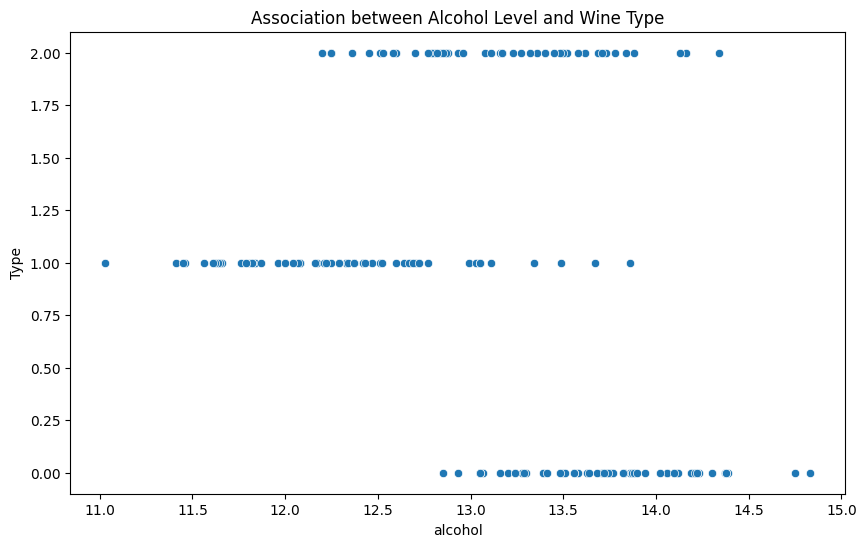

<ipython-input-6-59d5df7db7e9>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='malic_acid', y='Type', palette='viridis')


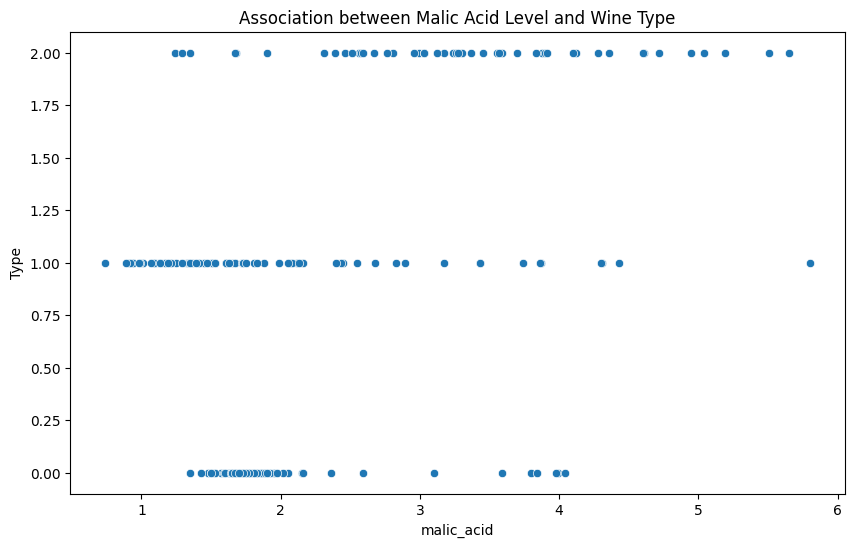

<ipython-input-6-59d5df7db7e9>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='total_phenols', y='Type', palette='viridis')


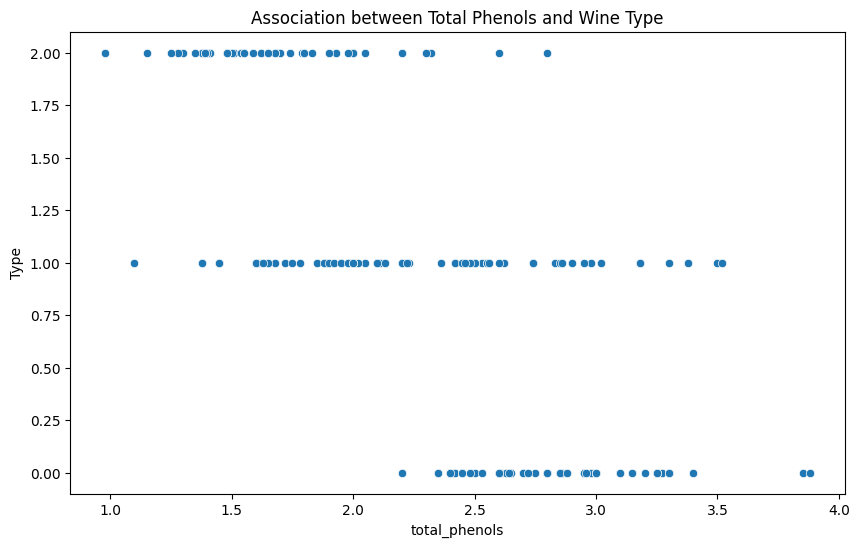

In [6]:
### your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Merge features with the response for easier plotting
data = X_full.copy()
data['Type'] = y

# Visualizing the association of alcohol with wine type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='alcohol', y='Type', palette='viridis')
plt.title('Association between Alcohol Level and Wine Type')
plt.show()

# Visualizing the association of malic acid with wine type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='malic_acid', y='Type', palette='viridis')
plt.title('Association between Malic Acid Level and Wine Type')
plt.show()

# Visualizing the association of total phenols with wine type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_phenols', y='Type', palette='viridis')
plt.title('Association between Total Phenols and Wine Type')
plt.show()

 The amount of alcohol and total level of phenols

**Q3**: Fit 3 different models with ['alcohol','malic_acid'] as the predictors: (1) a standard logistic regression to predict a binary indicator for class 0 (you'll have to crete it yourself), (2) a multinomial logistic regression to predict all 3 classes and (3) a OvR logistic reression to predict all 3 classes.  Compare the results

In [7]:
###your code here

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = X_full[['alcohol', 'malic_acid']]
y_binary = (y == 0).astype(int)  # Binary indicator for class 0

# Split data for binary model
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Split data for multi-class models
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Binary logistic regression
model_bin = LogisticRegression(random_state=42)
model_bin.fit(X_train_bin, y_train_bin)
y_pred_bin = model_bin.predict(X_test_bin)
accuracy_bin = accuracy_score(y_test_bin, y_pred_bin)
print("Binary Logistic Regression Accuracy:", accuracy_bin)
print(classification_report(y_test_bin, y_pred_bin))

Binary Logistic Regression Accuracy: 0.8148148148148148
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.71      0.79      0.75        19

    accuracy                           0.81        54
   macro avg       0.80      0.81      0.80        54
weighted avg       0.82      0.81      0.82        54



In [9]:
# Multinomial logistic regression
model_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
model_multi.fit(X_train_multi, y_train_multi)
y_pred_multi = model_multi.predict(X_test_multi)
accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)
print("Multinomial Logistic Regression Accuracy:", accuracy_multi)
print(classification_report(y_test_multi, y_pred_multi))

Multinomial Logistic Regression Accuracy: 0.7407407407407407
              precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.89      0.76      0.82        21
           2       0.62      0.57      0.59        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.75      0.74      0.74        54



In [10]:
# One-vs-Rest logistic regression
model_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs', random_state=42)
model_ovr.fit(X_train_multi, y_train_multi)
y_pred_ovr = model_ovr.predict(X_test_multi)
accuracy_ovr = accuracy_score(y_test_multi, y_pred_ovr)
print("One-vs-Rest Logistic Regression Accuracy:", accuracy_ovr)
print(classification_report(y_test_multi, y_pred_ovr))

One-vs-Rest Logistic Regression Accuracy: 0.7407407407407407
              precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.89      0.76      0.82        21
           2       0.62      0.57      0.59        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.75      0.74      0.74        54



*your answer here*

**Q4**: For the Multinomial model, use the estimated coefficients to calculate the predicted probabilties by hand.  Feel free to confirm with the `predict_proba` command.

In [13]:
### your code here
import numpy as np

# Define the softmax function
def softmax(logits):
    exps = np.exp(logits - np.max(logits))  # stabilize by subtracting max from logits
    return exps / np.sum(exps, axis=0)

# Assume model_multi is your trained Multinomial Logistic Regression model
coefficients = model_multi.coef_  # shape should be (n_classes, n_features)
intercepts = model_multi.intercept_  # shape should be (n_classes,)

# Choose an example from your test set
X_example = X_test_multi.iloc[0].values  # use iloc[0] to select the first test example

# Calculate logits
logits = np.dot(coefficients, X_example) + intercepts

# Calculate probabilities using softmax
probabilities = softmax(logits)
print("Calculated Probabilities:", probabilities)

# Confirm with predict_proba
proba_predicted = model_multi.predict_proba(X_example.reshape(1, -1))  # reshape if using a single sample
print("Predicted Probabilities from model:", proba_predicted)

Calculated Probabilities: [0.44540513 0.06137959 0.49321528]
Predicted Probabilities from model: [[0.44540513 0.06137959 0.49321528]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


*your answer here*

**Q5**: For the OvR model, use the `predict_proba()` to estimate the predicted probabilities in the test set, and manually use this to calculate the predicted classes.  Feel free to confirm with the `predict` command.

In [14]:
### your code here
predicted_probabilities = model_ovr.predict_proba(X_test_multi)
print("Predicted Probabilities:\n", predicted_probabilities)

Predicted Probabilities:
 [[0.4645247  0.05241369 0.48306161]
 [0.42869445 0.00461039 0.56669516]
 [0.18800824 0.37921075 0.43278101]
 [0.79539818 0.10354646 0.10105537]
 [0.15164757 0.7983422  0.05001023]
 [0.82132727 0.01763931 0.16103343]
 [0.00689768 0.62094635 0.37215597]
 [0.17794119 0.05890273 0.76315608]
 [0.0213657  0.92700062 0.05163368]
 [0.48185149 0.16613959 0.35200892]
 [0.69243078 0.15982864 0.14774057]
 [0.39956562 0.07912256 0.52131183]
 [0.19344539 0.06045511 0.7460995 ]
 [0.06747109 0.33808299 0.59444592]
 [0.73962    0.11445246 0.14592754]
 [0.08601794 0.67440431 0.23957774]
 [0.0232816  0.95247656 0.02424184]
 [0.08158415 0.87392888 0.04448697]
 [0.83279236 0.08142222 0.08578542]
 [0.06569923 0.87329892 0.06100185]
 [0.85401951 0.03004935 0.11593114]
 [0.53985743 0.41304484 0.04709773]
 [0.14582167 0.80896355 0.04521478]
 [0.09190507 0.03493379 0.87316114]
 [0.17524911 0.55558612 0.26916476]
 [0.60137804 0.04278209 0.35583987]
 [0.12566059 0.78501157 0.08932785]
 [

In [15]:
# Calculate predicted classes manually
manual_predictions = np.argmax(predicted_probabilities, axis=1)
print("Manually Calculated Predicted Classes:", manual_predictions)

Manually Calculated Predicted Classes: [2 2 2 0 1 0 1 2 1 0 0 2 2 2 0 1 1 1 0 1 0 0 1 2 1 0 1 1 1 0 0 1 2 0 0 0 0
 2 1 0 0 1 1 0 2 0 1 2 1 0 0 0 0 2]


In [16]:
# Use the model's predict method
model_predictions = model_ovr.predict(X_test_multi)
print("Model's Predicted Classes:", model_predictions)

# Comparing the manually calculated predictions to the model's predictions
comparison = np.array_equal(manual_predictions, model_predictions)
print("Do the manual predictions match the model's predictions?", "Yes" if comparison else "No")

Model's Predicted Classes: [2 2 2 0 1 0 1 2 1 0 0 2 2 2 0 1 1 1 0 1 0 0 1 2 1 0 1 1 1 0 0 1 2 0 0 0 0
 2 1 0 0 1 1 0 2 0 1 2 1 0 0 0 0 2]
Do the manual predictions match the model's predictions? Yes


**Q6**: How could you use the `predict_proba()` command and 'change the threshold' in the multiclass setting to affect predictive accuracies within each class?  Note: it is not as simple as changing a threshold because there is not threshold

In [17]:
import numpy as np

def predict_with_threshold(probabilities, threshold=0.5):
    predictions = []
    for prob in probabilities:
        max_prob = np.max(prob)
        if max_prob > threshold:
            predictions.append(np.argmax(prob))
        else:
            predictions.append(np.nan)  # or any other default/fallback class
    return predictions

# Example usage
predicted_probabilities = model_multi.predict_proba(X_test_multi)
predictions_with_threshold = predict_with_threshold(predicted_probabilities, threshold=0.5)
print(predictions_with_threshold)

[nan, 2, nan, 0, 1, 0, 1, 2, 1, nan, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, nan, 1, 1, 0, 2, nan, 1, 2, 1, 0, 0, 0, 0, 2]


In [18]:
def predict_with_class_thresholds(probabilities, thresholds):
    predictions = []
    for prob in probabilities:
        class_prediction = np.nan  # default to NaN or another fallback if no class meets its threshold
        for idx, threshold in enumerate(thresholds):
            if prob[idx] > threshold:
                class_prediction = idx
                break  # Assumes the first class to meet its threshold gets predicted
        predictions.append(class_prediction)
    return predictions

# Example thresholds for three classes
thresholds = [0.6, 0.5, 0.7]  # Customize these thresholds as needed per class
predictions_with_class_thresholds = predict_with_class_thresholds(predicted_probabilities, thresholds)
print(predictions_with_class_thresholds)

[nan, nan, nan, 0, 1, 0, 1, 2, 1, nan, 0, nan, 2, nan, 0, 1, 1, 1, 0, 1, 0, nan, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, nan, 1, 1, 0, 2, nan, 1, 2, 1, 0, nan, 0, 0, nan]


In [19]:
def scale_probabilities(probabilities, scale_factors):
    scaled_probabilities = []
    for prob in probabilities:
        scaled_prob = prob * scale_factors
        scaled_prob /= np.sum(scaled_prob)  # Normalize to make it a valid probability distribution
        scaled_probabilities.append(scaled_prob)
    return scaled_probabilities

# Example scaling factors for three classes
scale_factors = np.array([1.0, 1.2, 0.8])  # Increase likelihood of class 1, decrease for class 2
scaled_probabilities = scale_probabilities(predicted_probabilities, scale_factors)
scaled_predictions = np.argmax(scaled_probabilities, axis=1)
print(scaled_predictions)

[0 2 1 0 1 0 1 2 1 0 0 2 2 2 0 1 1 1 0 1 0 0 1 2 1 0 1 1 1 0 0 1 2 0 0 0 0
 2 1 0 0 1 1 0 2 0 1 2 1 0 0 0 0 2]


*your answer here*

**Q7**: Compare the accuracies in both train and test for both the multinomial and OvR logistic regressions.  Which seems to be performing better?  Is there any evidence of overfitting?  How could this be corrected?

In [20]:
### your code here
from sklearn.metrics import accuracy_score

# Calculate accuracies for Multinomial Logistic Regression
y_train_pred_multi = model_multi.predict(X_train_multi)
y_test_pred_multi = model_multi.predict(X_test_multi)
train_accuracy_multi = accuracy_score(y_train_multi, y_train_pred_multi)
test_accuracy_multi = accuracy_score(y_test_multi, y_test_pred_multi)

# Calculate accuracies for One-vs-Rest Logistic Regression
y_train_pred_ovr = model_ovr.predict(X_train_multi)
y_test_pred_ovr = model_ovr.predict(X_test_multi)
train_accuracy_ovr = accuracy_score(y_train_multi, y_train_pred_ovr)
test_accuracy_ovr = accuracy_score(y_test_multi, y_test_pred_ovr)

# Print the accuracies
print(f"Multinomial Logistic Regression - Train Accuracy: {train_accuracy_multi}, Test Accuracy: {test_accuracy_multi}")
print(f"One-vs-Rest Logistic Regression - Train Accuracy: {train_accuracy_ovr}, Test Accuracy: {test_accuracy_ovr}")

Multinomial Logistic Regression - Train Accuracy: 0.8225806451612904, Test Accuracy: 0.7407407407407407
One-vs-Rest Logistic Regression - Train Accuracy: 0.8145161290322581, Test Accuracy: 0.7407407407407407


Model Performance Analysis:

	•	Multinomial and OvR Logistic Regression both have test accuracies of 74.07%.
	•	The Multinomial model shows a slight overfitting with a training accuracy of 82.28%, compared to its test accuracy.

Recommendations to Correct Overfitting:

	•	Increase regularization to penalize model complexity.
	•	Use cross-validation to optimize model parameters effectively.

Both models are equally effective on unseen data, but the Multinomial model could benefit from adjustments to reduce overfitting and improve generalization.

**Q8**: Create the classification boundaries for the two multiclass logistic regression models above.  How do they compare?

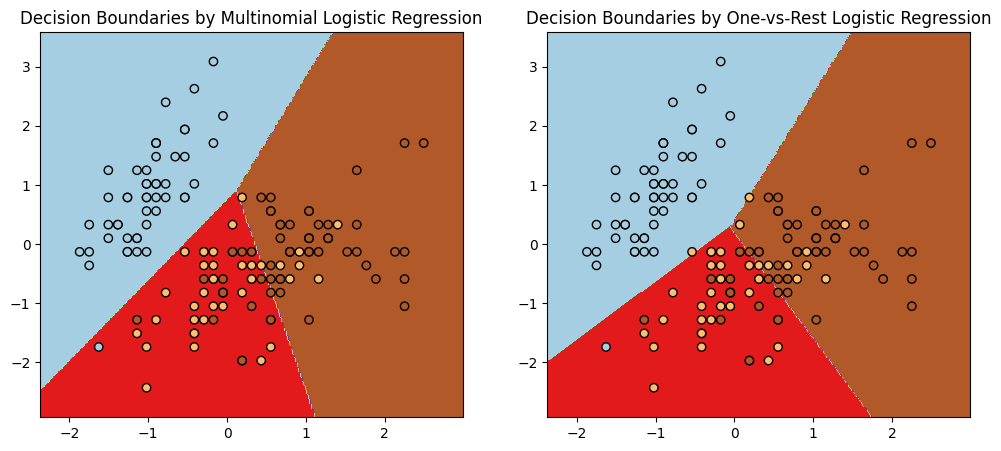

In [21]:
###your code here

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load dataset (this needs to be replaced with your actual dataset)
iris = datasets.load_iris()
X = iris.data[:, :2]  # we take the first two features for simplicity
y = iris.target

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a mesh to plot in
x_min, x_max = X_scaled[:, 0].min() - .5, X_scaled[:, 0].max() + .5
y_min, y_max = X_scaled[:, 1].min() - .5, X_scaled[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Train the models
model_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
model_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs', random_state=42)
model_multi.fit(X_scaled, y)
model_ovr.fit(X_scaled, y)

# Predict each point on the mesh
Z_multi = model_multi.predict(np.c_[xx.ravel(), yy.ravel()])
Z_ovr = model_ovr.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z_multi = Z_multi.reshape(xx.shape)
Z_ovr = Z_ovr.reshape(xx.shape)

plt.figure(1, figsize=(12, 5))

plt.subplot(121)
plt.contourf(xx, yy, Z_multi, cmap=plt.cm.Paired)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.title('Decision Boundaries by Multinomial Logistic Regression')

plt.subplot(122)
plt.contourf(xx, yy, Z_ovr, cmap=plt.cm.Paired)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.title('Decision Boundaries by One-vs-Rest Logistic Regression')

plt.show()

*your answer here*

The differences in decision boundaries reflect how each model conceptualizes the class space. The smoother boundaries from the Multinomial model suggest it might be better at handling interclass transitions, while the OvR model’s more abrupt changes indicate potential issues in areas of class overlap or where distinguishing features are less pronounced.

**Q9**: Fit 3 different knn regression models: for $k = 3, 10, 30$. Visualize the classification boundaries for these 3 models and compare the results.  Which seem to be overfit?

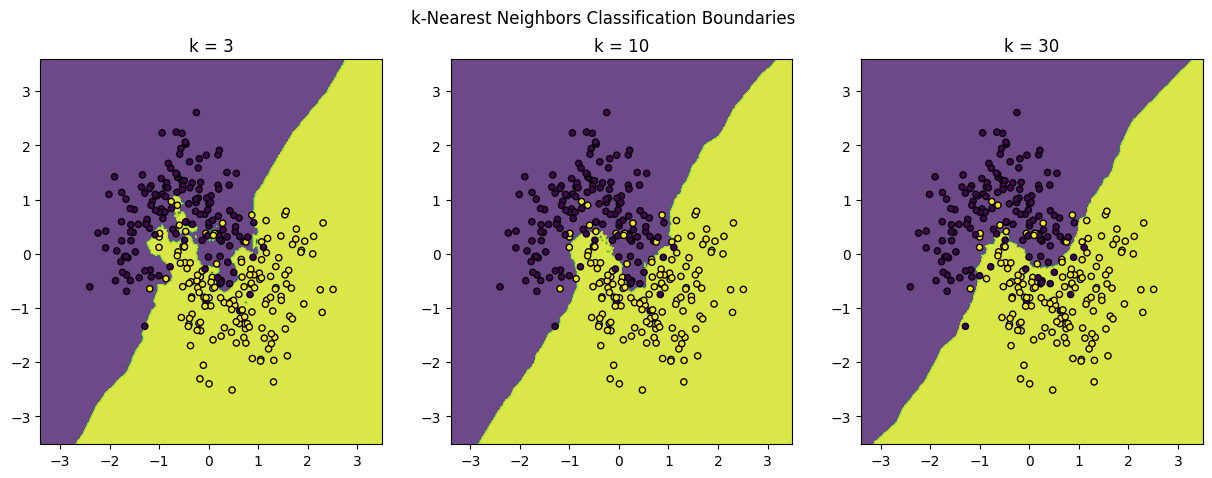

In [22]:
### your answer here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Create a synthetic dataset
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# k values to use
k_values = [3, 10, 30]

# Set up the subplot figure
plt.figure(figsize=(15, 5))

# Generate decision boundaries for each k
for i, k in enumerate(k_values, 1):
    # Fit the kNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)

    # Create a mesh to plot in
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the trained model
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the results
    plt.subplot(1, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=20, edgecolor='k')
    plt.title(f'k = {k}')

plt.suptitle('k-Nearest Neighbors Classification Boundaries')
plt.show()

*your answer here*

The model with  k = 3 is overfitting.

**Q10** How could you visualize the classification boundary for any of these models if there was a single predictor?  What if there were more than 2 predictors?

*your answer here*

	1.	Single Predictor:
	•	Visualize with a 1D plot where the x-axis represents the predictor and color changes or vertical lines indicate class changes.
	2.	Two Predictors:
	•	Use a 2D plot with a contour or scatter plot showing decision boundaries where different colors or symbols represent different classes.
	3.	More Than Two Predictors:
	•	Three Predictors: Create 3D plots where the spatial distribution of points can illustrate the boundaries.
	•	More than Three: Utilize dimensionality reduction techniques (like PCA or t-SNE) to reduce the data to two or three dimensions and then plot as for two or three predictors.